In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
import os
from scipy import misc
import json
import pprint

%matplotlib inline

In [2]:
BODY_PARTS = [
    "Nose",
    "Neck",
    "RShoulder",
    "RElbow",
    "RWrist",
    "LShoulder",
    "LElbow",
    "LWrist",
    "RHip",
    "RKnee",# Add 10 to remove blown-out artifacts
    "RAnkle",
    "LHip",
    "LKnee",
    "LAnkle",
    "REye",
    "LEye",
    "REar",
    "LEar",
    "Bkg",
]

In [44]:
# OPENPOSE_ROOT = '/home/albert/openpose/'

OPENPOSE_ROOT = '/Users/tradergllc/openpose/pose_id/'

In [56]:
def render_frame(f):
    img_file = OPENPOSE_ROOT + 'DJI_seq/DJI_0005_%d.png' % f
    pose_file = OPENPOSE_ROOT + 'DJI_pose/DJI_0005_%d_keypoints.json' % f
    render_file = OPENPOSE_ROOT + 'DJI_render/DJI_0005_%d_rendered.png' % f
    #     heatmap_file = OPENPOSE_ROOT + 'DJI_seq/DJI_0005_' + f + '.png'

    img = misc.imread(img_file)
    render = misc.imread(render_file)

    with open(pose_file) as data_file:    
        data = json.load(data_file)

    for p in range(len(data['people'])):
        x_max, x_min = 0, img.shape[1]
        y_max, y_min = 0, img.shape[0]
        
        for k_type in data['people'][p].keys():
            pose_dict = {'x' : [], 'y' : [], 'c' : []}

            for i in range(0, len(data['people'][p][k_type]), 3):
                x = data['people'][p][k_type][i]
                y = data['people'][p][k_type][i + 1]
                c = data['people'][p][k_type][i + 2]
                
                img = cv2.circle(img,(int(x),int(y)), 5, (0,int(255 * c),int(255 * c)), -1)
                
                pose_dict['x'].append(x)
                pose_dict['y'].append(y)
                pose_dict['c'].append(c)
                
                if k_type == 'pose_keypoints':
                    if x < x_min and x > 0:
                        x_min = x
                    if x > x_max:
                        x_max = x
                    if y < y_min and y > 0:
                        y_min = y
                    if y > y_max:
                        y_max = y

            data['people'][p][k_type] = pose_dict
            
            diff_x = x_max - x_min
            diff_y = y_max - y_min
            r_x = 0.5
            r_y = 0.2
            img = cv2.rectangle(img, (int(x_min-r_x*diff_x),int(y_min-r_y*diff_y)), 
                                    (int(x_max+r_x*diff_x),int(y_max+r_y*diff_y)), 
                                    (0,255,0), 3)
    return img, len(data['people'])

In [57]:
!pwd

/Users/tradergllc/openpose/pose_id


In [61]:
frames= []
f_n = 150
start = time.time()

for f in range(0, f_n * 5, 5):
    if f % 50 == 0:
        end = time.time()
        print("Frames rendered: %d, Time: %.4f" % (f / 5, end - start))

    img, n_people = render_frame(f)
    frames.append(render_frame(f))
    
print("Render complete!")

Frames rendered: 0, Time: 0.0002
Frames rendered: 10, Time: 6.0079
Frames rendered: 20, Time: 11.7600
Frames rendered: 30, Time: 17.5454
Frames rendered: 40, Time: 23.2532
Frames rendered: 50, Time: 29.0879
Frames rendered: 60, Time: 35.1009
Frames rendered: 70, Time: 41.2167
Frames rendered: 80, Time: 47.6037
Frames rendered: 90, Time: 53.4720
Frames rendered: 100, Time: 59.2991
Frames rendered: 110, Time: 65.1335
Frames rendered: 120, Time: 71.1930
Frames rendered: 130, Time: 77.1104
Frames rendered: 140, Time: 82.9280
Render complete!


In [66]:
print(frames)

[(array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [215, 204, 210],
        [215, 204, 210],
        [215, 204, 210]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [215, 204, 210],
        [215, 204, 210],
        [215, 204, 210]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [215, 204, 210],
        [215, 204, 210],
        [215, 204, 210]],

       ..., 
       [[ 62,  48,  45],
        [ 62,  48,  45],
        [ 62,  48,  45],
        ..., 
        [ 67,  53,  50],
        [ 68,  54,  51],
        [ 68,  54,  51]],

       [[ 64,  50,  47],
        [ 64,  50,  47],
        [ 64,  50,  47],
        ..., 
        [ 67,  53,  50],
        [ 68,  54,  51],
        [ 68,  54,  51]],

       [[ 65,  51,  48],
        [ 65,  51,  48],
        [ 65,  51,  48],
        ..., 
        [ 67,  53,  50],
        [ 68,  54,  51],
        [ 68,  5

In [62]:
writer = imageio.get_writer('DJI_render.mp4', fps=5)

for fm in frames:
    writer.append_data(fm)
writer.close()

ValueError: append_data requires ndarray as first arg

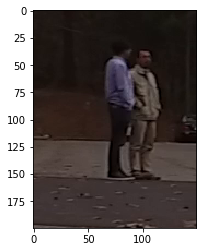

In [7]:
# Check to see if OpenPose works on zoomed images
zoom = img[600:800, 550:700]
plt.imshow(zoom)

In [50]:
import time
start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.000442981719971
